# データセットの作成（2クラス）

チャンネル:  Fz
----------------------------------------
標準化しました。
正規化しました。
外れ値除去しました。
----------------------------------------


0it [00:00, ?it/s]

['12', '1']
12-1 をキーに追加しました
['10', '1']
10-1 をキーに追加しました
['8', '1']
8-1 をキーに追加しました
['13', '2']
13-2 をキーに追加しました
['5', '1']
5-1 をキーに追加しました
['1', '1']
1-1 をキーに追加しました
['3', '2']
3-2 をキーに追加しました
['3', '1']
3-1 をキーに追加しました
['6', '2']


1it [00:00,  1.79it/s]

6-2 をキーに追加しました
['6', '1']
6-1 をキーに追加しました
['2', '1']
2-1 をキーに追加しました
['10', '3']
10-3 をキーに追加しました
['8', '3']
8-3 をキーに追加しました
['14', '3']
14-3 をキーに追加しました
['14', '2']
14-2 をキーに追加しました
['11', '2']
11-2 をキーに追加しました
['11', '3']
11-3 をキーに追加しました
['9', '3']
9-3 をキーに追加しました
['5', '3']
5-3 をキーに追加しました
['5', '2']
5-2 をキーに追加しました
['7', '3']
7-3 をキーに追加しました
['1', '3']
1-3 をキーに追加しました
['6', '3']
6-3 をキーに追加しました
['4', '3']
4-3 をキーに追加しました
['4', '2']
4-2 をキーに追加しました
['2', '2']


2it [00:01,  1.49it/s]

2-2 をキーに追加しました
----------------------------------------
ウィンドウ: 13秒, スライド: 1秒でデータのセグメンテーションが完了しました。
----------------------------------------
データがセグメントされた辞書: split_data_dic
ラベルの取り出し例: label = list(split_data_dic["1-1"])
データの取り出し例: data = split_data_dic["1-1"][label]
セグメントされた行列データ形状:  (588, 6656)
----------------------------------------
セグメントされたデータの取り出しが完了しました。
セグメントされたデータの形状:  (588, 6656)


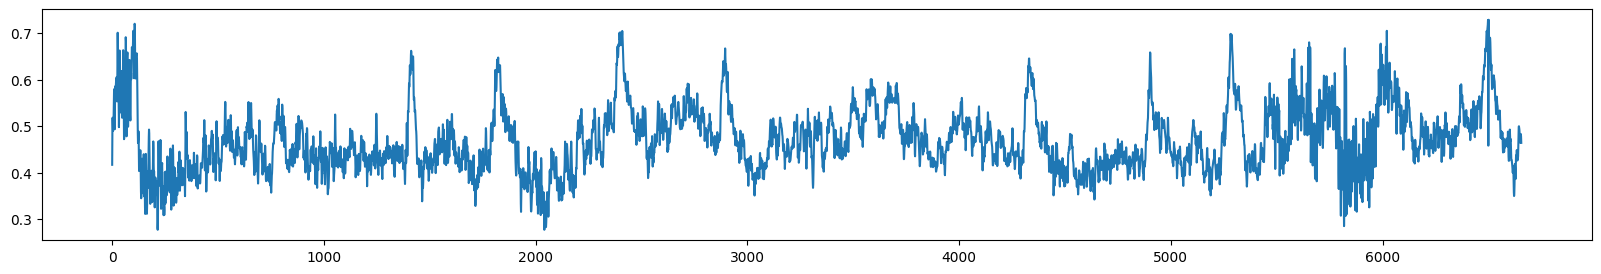

In [1]:

# 辞書データの作成
import sys
sys.path.append('./independent_project')  # ライブラリのファイルがあるディレクトリを追加
import load_data, preprocessing, need_utils
import numpy as np


CHANNEL = "Fz"  # チャンネル名
print("チャンネル: ", CHANNEL)

WINDOW_SEC = 13  # 分割するウィンドウサイズ（秒）
OVER_SEC = 12
SLIDE_SEC = WINDOW_SEC - OVER_SEC  # スライドする時間（秒）

# EMGの有効周波数帯は0-500Hzなのでバンドパスフィルタはかけない
BANDPASS = False  # True: バンドパスフィルタをかける / False: バンドパスフィルタをかけない
FS = 512
LOWCUT = 0.5
HIGHCUT = 70.0

STANDARDIZATION = True
NORMALIZATION = True
REMOVE_OUTLIERS = True

DOWNSAMPLING = False  # True: ダウンサンプリングを行う / False: ダウンサンプリングを行わない
FR = 64
CUTOFF = FR/2


# 適用した前処理の表示
print("----------------------------------------")
if BANDPASS:
    print("バンドパスフィルタ: ", f"{LOWCUT} - {HIGHCUT} Hz")
if STANDARDIZATION:
    print("標準化しました。")
if NORMALIZATION:
    print("正規化しました。")
if REMOVE_OUTLIERS:
    print("外れ値除去しました。")
if DOWNSAMPLING:
    print("ダウンサンプリングしました。")
    print("ダウンサンプリング後のサンプリング周波数: ", FR, "Hz")
print("----------------------------------------")


# 被験者の実験データを辞書に格納
data_dic = load_data.create_dataset_for_independent(CHANNEL, BANDPASS, FS, LOWCUT, HIGHCUT, STANDARDIZATION, NORMALIZATION, REMOVE_OUTLIERS, DOWNSAMPLING, CUTOFF, FR, WINDOW_SEC, OVER_SEC)


# 被験者のデータリスト
subj_list = [
    "1-1", "1-3",
    "2-1", "2-2",
    "3-1", "3-2",
    "4-2", "4-3",
    "5-1", "5-2", "5-3",
    "6-1", "6-2", "6-3",
    "7-3",
    "8-1", "8-3",
    "9-3",
    "10-1", "10-3",
    "11-2", "11-3",
    "12-1",
    "13-2",
    "14-2", "14-3"
]



# 辞書内データのセグメンテーション
split_data_dic = preprocessing.split_data_by_subject(data_dic, WINDOW_SEC, SLIDE_SEC)  # 辞書内のデータを分割
print("----------------------------------------")
print("データがセグメントされた辞書: split_data_dic")
print("ラベルの取り出し例: label = list(split_data_dic[\"1-1\"])")  # ラベルの取り出し例
print("データの取り出し例: data = split_data_dic[\"1-1\"][label]")  # データの取り出し例
print("セグメントされた行列データ形状: ", np.array(list(split_data_dic["1-1"].values())[0]).shape)  # 分割されたデータの形状を表示



# セグメントされたデータの取り出し（例）
segments = need_utils.get_segments_from_split_data(split_data_dic, "1-1")
print("セグメントされたデータの形状: ", segments.shape)  # セグメントされたデータの形状を表示 --> (セグメント数, サンプル数)


import matplotlib.pyplot as plt
plt.figure(figsize=(20, 3))
plt.plot(segments[0])
plt.show()


## 被験者のリスト

In [4]:
test_subj_list = ["1-1", "1-3"]  # テストデータの被験者リスト
# test_subj_list = ["2-1", "2-2"]  # テストデータの被験者リスト
# test_subj_list = ["3-1", "3-2"]
# test_subj_list = ["4-2", "4-3"]
# test_subj_list = ["5-1", "5-2", "5-3"]
# test_subj_list = ["6-1", "6-2", "6-3"]
# test_subj_list = ["7-3"]
# test_subj_list = ["8-1", "8-3"]
# test_subj_list = ["9-3"]
# test_subj_list = ["10-1", "10-3"]
# test_subj_list = ["11-2", "11-3"]
# test_subj_list = ["12-1"]
# test_subj_list = ["13-2"]
# test_subj_list = ["14-2", "14-3"]

In [6]:
segments_1_1 = need_utils.get_segments_from_split_data(split_data_dic, "1-1")
print("セグメントされたデータの形状: ", segments_1_1.shape)  # セグメントされたデータの形状を表示 --> (セグメント数, サンプル数)

----------------------------------------
セグメントされたデータの取り出しが完了しました。
セグメントされたデータの形状:  (588, 6656)


In [7]:
EEG_data = segments_1_1

In [ ]:
import numpy as np
import scipy.signal as signal
import scipy.stats as stats
import antropy as ant  # 修正: antropyを使用
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


fs = 512  # サンプリング周波数

# --- 2. 複雑性指標の計算 ---
def compute_lzc(signal):
    """Lempel-Ziv Complexity 計算"""
    binarized = (signal > np.median(signal)).astype(int)  # バイナリ変換
    return ant.lempel_ziv_complexity(binarized, normalize=True)  # 修正: antropyを使用

def compute_pe(signal):
    """Permutation Entropy 計算"""
    return ant.perm_entropy(signal, order=3, normalize=True)  # 修正: antropyを使用

# --- 3. 周波数成分解析 ---
def compute_bandpower(sig, fs, band):
    """指定した周波数帯のバンドパワーを計算"""
    f, Pxx = signal.welch(sig, fs=fs, nperseg=fs*2)
    band_idx = np.logical_and(f >= band[0], f <= band[1])
    return np.trapz(Pxx[band_idx], f[band_idx])

bands = {'delta': (0.5, 4), 'theta': (4, 8), 'alpha': (8, 12), 'beta': (12, 30)}

# --- 4. 特徴量抽出 ---
features = []
for i in range(EEG_data.shape[0]):  # 各セグメント
    sig = EEG_data[i, :]
    feature_row = [compute_lzc(sig), compute_pe(sig)]
    for band in bands.values():
        feature_row.append(compute_bandpower(sig, fs, band))
    features.append(feature_row)

features = np.array(features)

# --- 5. クラス間の統計比較（t検定） ---
feature_names = ['LZC', 'PE', 'Delta', 'Theta', 'Alpha', 'Beta']
for i, name in enumerate(feature_names):
    t_stat, p_val = stats.ttest_ind(features[labels==0, i], features[labels==1, i])
    print(f"{name}: t={t_stat:.3f}, p={p_val:.3f}")

# --- 6. t-SNE可視化 ---
tsne = TSNE(n_components=2).fit_transform(features)
plt.figure(figsize=(6,5))
plt.scatter(tsne[labels == 0, 0], tsne[labels == 0, 1], label="Awake", alpha=0.7)
plt.scatter(tsne[labels == 1, 0], tsne[labels == 1, 1], label="Drowsy", alpha=0.7)
plt.legend()
plt.title("t-SNE Visualization of Fz EEG Features")
plt.show()
